In [2]:
# Importing libraries

import json
from tqdm import tqdm
import numpy as np
from sklearn.preprocessing import StandardScaler
import plotly.plotly as py
import plotly.graph_objs as go
import pandas as pd
from datetime import datetime
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
from scipy.stats import norm
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge
import math
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d 
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras import optimizers
from hmmlearn.hmm import GaussianHMM
from sklearn.model_selection import train_test_split
from tqdm import tqdm
from docopt import docopt
import warnings
import logging
import itertools

% matplotlib inline

Using TensorFlow backend.


In [3]:
# index.txt has the list of 50 stocks in NIFTY index

f = open('index.txt')
lines = list(f)
indices = [i.strip('\n') for i in lines]
f.close()

In [7]:
# main_dict[i] has stocks history of all 50 indices (not in sorted order).

main_dict = {}
for i in tqdm(indices[1:]):
#     print(i)
    fn='INTRADAY_JSON/'+i+'.json'
    f = open(fn)
    lines = list(f)
    lines = lines[0]
    data = json.loads(lines)
    try: main_dict[i] = dict(sorted(data['intraday'].items(), reverse=True))
    except: print(i)

100%|██████████| 50/50 [00:00<00:00, 366.91it/s]

HCLTECH
BAJFINANCE
ITC
DRREDDY
BRITANNIA
M&M
ICICIBANK
POWERGRID
HDFC
BHARTIARTL
INFY
KOTAKBANK
EICHERMOT
LT
ADANIPORTS
NTPC
SBIN
TATASTEEL
GRASIM
INFRATEL
ZEEL
INDUSINDBK
VEDL
HINDALCO
YESBANK
IBULHSGFIN


In [4]:
fn='INTRADAY_JSON/'+'NIFTY50'+'.json'
f = open(fn)
lines = list(f)
lines = lines[0]
f.close()
data = json.loads(lines)
history = sorted(data['intraday'].items(), reverse=True)

fn='INTRADAY_JSON/'+'GAIL'+'.json'
f = open(fn)
lines = list(f)
lines = lines[0]
f.close()
data = json.loads(lines)
history_gail = sorted(data['intraday'].items(), reverse=True)

fn='INTRADAY_JSON/'+'HDFCBANK'+'.json'
f = open(fn)
lines = list(f)
lines = lines[0]
f.close()
data = json.loads(lines)
history_hdfc = sorted(data['intraday'].items(), reverse=True)

In [6]:
history = history[::-1]
history_gail = history_gail[::-1]
history_hdfc = history_hdfc[::-1]

In [5]:
for i in history:
    i[1]['close']=float(i[1]['close'])
    i[1]['open']=float(i[1]['open'])
    i[1]['high']=float(i[1]['high'])
    i[1]['low']=float(i[1]['low'])
    i[1]['volume']=float(i[1]['volume'])
    
for i in history_gail:
    i[1]['close']=float(i[1]['close'])
    i[1]['open']=float(i[1]['open'])
    i[1]['high']=float(i[1]['high'])
    i[1]['low']=float(i[1]['low'])
    i[1]['volume']=float(i[1]['volume'])
    
for i in history_hdfc:
    i[1]['close']=float(i[1]['close'])
    i[1]['open']=float(i[1]['open'])
    i[1]['high']=float(i[1]['high'])
    i[1]['low']=float(i[1]['low'])
    i[1]['volume']=float(i[1]['volume'])

In [7]:
X_train = []
Y_train = []

X_test = []
Y_test = []

time = []
TS = 40
for k in range(0,5):
    for i in tqdm(range(TS+1+k*375, (k+1)*375)):
        temp = []
        for j in range(i-TS, i):
            temp.append(history[j][1]['open'])
#             temp.append((history[j][1]['close']-history[j-1][1]['close'])*100/history[j-1][1]['close'])
            temp.append(history[j][1]['high'])
            temp.append(history[j][1]['low'])
            temp.append(history_gail[j][1]['close'])
            temp.append(history_hdfc[j][1]['close'])
#             temp.append(history[j][1]['high']-history[j][1]['low'])
        X_train.append(temp)
        Y_train.append(history[i][1]['close'])
        time.append(history[i][0])

100%|██████████| 334/334 [00:00<00:00, 12869.98it/s]


In [8]:
X_test = X_train[-334:]
Y_test = Y_train[-334:]
Y_test = np.array(Y_test).reshape(-1,1)

X_train = X_train[:-334]
Y_train = Y_train[:-334]
Y_train = np.array(Y_train).reshape(-1,1)

sx = StandardScaler()
X_train = sx.fit_transform(X_train)
sy = StandardScaler()
Y_train = sy.fit_transform(Y_train)

sx_t = StandardScaler()
X_test = sx_t.fit_transform(X_test)
sy_t = StandardScaler()
Y_test = sy_t.fit_transform(Y_test)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [9]:
X_train.shape, X_test.shape

((1336, 200, 1), (334, 200, 1))

In [10]:
regressor = Sequential()

regressor.add(LSTM(units = 70, return_sequences = True, input_shape = (X_train.shape[1], 1)))
# regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 70))
# regressor.add(Dropout(0.2))

# regressor.add(LSTM(units = 50, return_sequences = True))
# regressor.add(Dropout(0.2))

# regressor.add(LSTM(units = 50))
# regressor.add(Dropout(0.2))

regressor.add(Dense(units = 1))

# adam = optimizers.Adam(lr=0.01, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')
print(regressor.summary())
regressor.fit(X_train, Y_train, epochs = 30, batch_size = 32)

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 200, 70)           20160     
_________________________________________________________________
lstm_2 (LSTM)                (None, 70)                39480     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 71        
Total params: 59,711
Trainable params: 59,711
Non-trainable params: 0
_________________________________________________________________
None
Instructions for updating:
Use tf.cast instead.
Epoch 1/30
1336/1336 [==============================] - 12s 9ms/step - loss: 0.1665
Epoch 2/30
1336/1336 [==============================] - 9s 7ms/step - loss: 0.0504
Epoch 3/30
1336/1336 [==============================] - 9s 7ms/step - loss: 0.0452
Epoch 4/30
1336/1336 [=====

In [11]:
Y_predicted = regressor.predict(X_train)
print(mean_squared_error(Y_train, Y_predicted))
Y_predicted = sy.inverse_transform(Y_predicted)
Y_actual = sy.inverse_transform(Y_train)

0.004319805064394127


In [12]:
# x = dates[:int(len(Y)*0.2)][::-1]
data = [go.Scatter(y=Y_actual[1:], name='Actual'), go.Scatter(y=Y_predicted[:-1], name='Predicted')]
py.iplot(data, filename = 'nifty-50')

In [13]:
Y_predicted = regressor.predict(X_test)
print(mean_squared_error(Y_test, Y_predicted))
Y_predicted = sy_t.inverse_transform(Y_predicted)
Y_actual = sy_t.inverse_transform(Y_test)

0.018996332048995316


In [14]:
data = [go.Scatter(y=Y_actual, name='Actual'), go.Scatter(y=Y_predicted, name='Predicted')]
py.iplot(data, filename = 'nifty-50')


100%|██████████| 188/188 [08:26<00:00,  3.00s/it]


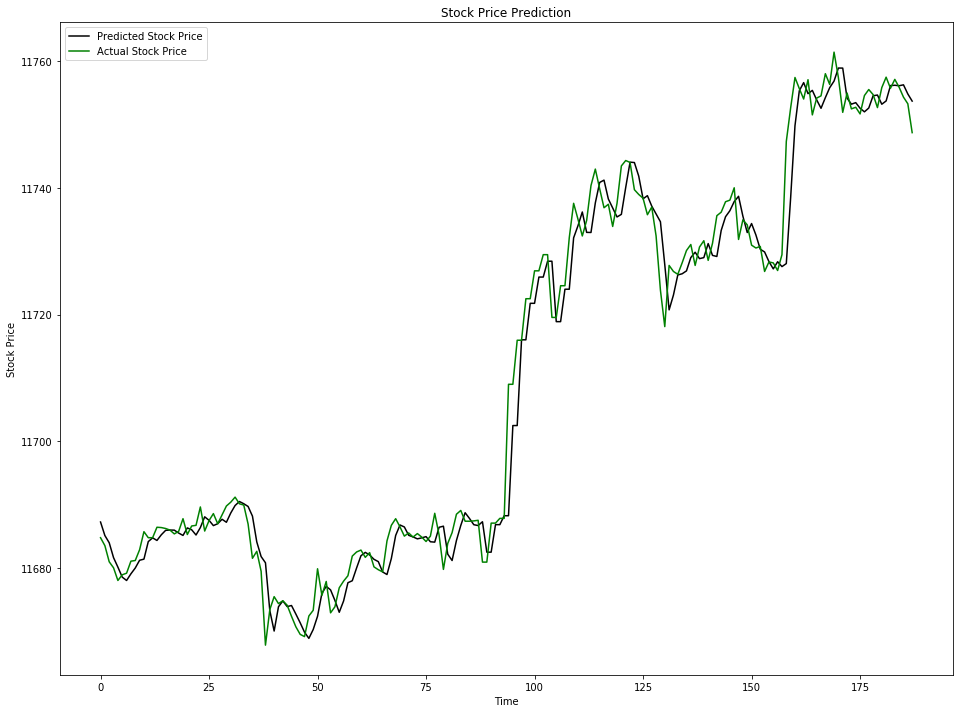

[11687.275765350876,
 11685.142488157895,
 11684.000851535087,
 11681.650913377196,
 11680.15928596491,
 11678.58432741228,
 11678.051008114036,
 11679.100980482457,
 11680.017623026317,
 11681.242590789474,
 11681.41758618421,
 11684.184180043861,
 11684.77583114035,
 11684.367508552632,
 11685.259151754386,
 11685.959133333332,
 11686.009132017547,
 11685.992465789473,
 11685.534144517544,
 11685.159154385963,
 11686.342456578946,
 11686.050797587719,
 11685.225819298246,
 11686.400788377194,
 11688.092410526317,
 11687.542425000001,
 11686.709113596493,
 11687.009105701756,
 11687.709087280702,
 11687.234099780702,
 11688.692394736841,
 11689.875696929827,
 11690.509013596491,
 11690.159022807018,
 11689.725700877194,
 11688.20907412281,
 11684.13418135965,
 11681.825908771929,
 11680.84260131579,
 11673.301133114037,
 11670.076217982458,
 11673.909450438596,
 11674.826092982456,
 11673.934449780703,
 11674.101112061404,
 11672.759480701754,
 11671.37618377193,
 11669.892889473684,


In [185]:
class StockPredictor(object):
    def __init__(self, test_size=0.1, n_hidden_states=4, n_latency_days=20, n_steps_frac_change=20, n_steps_frac_change1=20, n_steps_frac_change2=20):
#         self._init_logger()
        self.n_latency_days = n_latency_days
        self.n_hidden_states = n_hidden_states
        self.hmm = GaussianHMM(n_components=n_hidden_states)
        self._train_data, self._test_data = train_test_split(df, test_size=test_size, shuffle=False) 
        self._compute_all_possible_outcomes(n_steps_frac_change, n_steps_frac_change1, n_steps_frac_change2)
    
#     def _init_logger(self):
#         self._logger = logging.getLogger(__name__)
#         handler = logging.StreamHandler()
#         formatter = logging.Formatter('%(asctime)s %(name)-12s %(levelname)-8s %(message)s')
#         handler.setFormatter(formatter)
#         self._logger.addHandler(handler)
#         self._logger.setLevel(logging.DEBUG)
                
    @staticmethod
    def _extract_features(data):
        open_price = np.array(data['open'])
        average_price = np.array(data['average'])
        close_price = np.array(data['close'])
                
        temp_close = np.concatenate((np.array([open_price[0]]), close_price[:-1]), axis=0)
        temp_average = np.concatenate((np.array([open_price[0]]), average_price[:-1]), axis=0)
        temp_open = np.concatenate((np.array([open_price[0]]), open_price[:-1]), axis=0)
        
        frac_change = ((close_price - temp_close) / temp_close)[1:]
        frac_change1 = ((close_price - temp_average) / temp_average)[1:]
        frac_change2 = ((close_price - temp_open) / temp_open)[1:]

        return np.column_stack((frac_change, frac_change1, frac_change2))

    def fit(self):
#         self._logger.info('>>> Building Features')
        feature_vector = StockPredictor._extract_features(self._train_data)
#         self._logger.info('Features Extraction Completed <<<')
        self.hmm.fit(feature_vector)
 
    def _compute_all_possible_outcomes(self, n_steps_frac_change, n_steps_frac_change1, n_steps_frac_change2):
        frac_change_range = np.linspace(-0.0005, 0.0005, n_steps_frac_change)
        frac_change1_range = np.linspace(-0.0005, 0.0005, n_steps_frac_change1)
        frac_change2_range = np.linspace(-0.0005, 0.0005, n_steps_frac_change2)
 
        self._possible_outcomes = np.array(list(itertools.product(frac_change_range, frac_change1_range, frac_change2_range)))
        return
    
    def _get_most_probable_outcome(self, day_index):
        previous_data_start_index = max(0, len(self._train_data)-day_index-self.n_latency_days)
        previous_data_end_index = max(0, len(self._train_data)-day_index-1)
        previous_data = df.iloc[previous_data_start_index:previous_data_end_index]
        previous_data_features = StockPredictor._extract_features(previous_data)
 
        outcome_score = []
        for possible_outcome in self._possible_outcomes:
            total_data = np.row_stack((previous_data_features, possible_outcome))
            outcome_score.append(self.hmm.score(total_data))
            
        most_probable_outcome = self._possible_outcomes[np.argmax(outcome_score)]
 
        return most_probable_outcome
 
    def predict_open_price(self, day_index):
        predicted_frac_change, predicted_frac_change1, predicted_frac_change2 = self._get_most_probable_outcome(day_index)
        return (df['close'][(len(self._train_data)+day_index-1)]*(predicted_frac_change+1) + df['average'][(len(self._train_data)+day_index-1)]*(predicted_frac_change1+1) + df['open'][(len(self._train_data)+day_index-1)]*(predicted_frac_change2+1)) / 3
    
    def predict_open_prices_for_days(self, with_plot=False):
        predicted_open_prices = []
        for day_index in tqdm(range(len(self._test_data))):
#         for day_index in tqdm(range(10)):
            predicted_open_prices.append(self.predict_open_price(day_index))
        test_data = self._test_data
        actual_open_prices = test_data['close'].values
        
        plt.figure(figsize=(16,12))
        plt.plot(predicted_open_prices, color = 'black', label = 'Predicted Stock Price')
        plt.plot(actual_open_prices, color = 'green', label = 'Actual Stock Price')
        plt.title('Stock Price Prediction')
        plt.xlabel('Time')
        plt.ylabel('Stock Price')
        plt.legend()
        plt.show()
#         plt.savefig('HMM_'+str(self.n_hidden_states)+'_'+str(self.n_latency_days)+'.png')
 
        return predicted_open_prices
 
stock_predictor = StockPredictor(n_hidden_states=6, n_latency_days=20)
stock_predictor.fit()
stock_predictor.predict_open_prices_for_days()

In [164]:
df = pd.DataFrame(columns=['open', 'close', 'low', 'high'])
temp1,temp2, temp3, temp4 = [], [], [], []
for i in history:
    temp1.append(i[1]['open'])
    temp2.append(i[1]['close'])
    temp3.append(i[1]['high'])
    temp4.append(i[1]['low'])
    
df['open']=temp1
df['close']=temp2
df['high']=temp3
df['low']=temp4

In [165]:
df['average']=(df['low']+df['high'])/2

In [168]:
df.shape[0]/5

375.0